### KMEANS

In [79]:
import pandas as pd

# Cargar el dataset
df_mobile = pd.read_csv("archivos_limpios/moblie_usuage_limpio.csv")

# Ver las primeras filas
df_mobile.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [80]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.2+ KB


In [81]:
df_mobile.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,288.819436,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,1.000000,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,250.750000,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,500.500000,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,750.250000,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,1000.000000,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Definir variables
numerical_features = [
    "Age",
    "Total_App_Usage_Hours",
    "Daily_Screen_Time_Hours",
    "Number_of_Apps_Used",
    "Social_Media_Usage_Hours",
    "Productivity_App_Usage_Hours",
    "Gaming_App_Usage_Hours"
]

categorical_features = ["Gender", "Location"]

# 3. Preprocesamiento: Normalización + One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)  # drop first to avoid dummy trap
    ]
)

# 4. Aplicar transformación
X_preprocessed = preprocessor.fit_transform(df_mobile)

In [83]:
# Probar distintos k
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_preprocessed)
    score = silhouette_score(X_preprocessed, labels)
    silhouette_scores.append((k, score))

# Mostrar resultados
for k, score in silhouette_scores:
    print(f"k = {k}: Silhouette Score = {score:.3f}")

# Elegir mejor k
best_k = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"\nMejor número de clústeres: {best_k}")

k = 2: Silhouette Score = 0.095
k = 3: Silhouette Score = 0.086
k = 4: Silhouette Score = 0.088
k = 5: Silhouette Score = 0.091
k = 6: Silhouette Score = 0.089

Mejor número de clústeres: 2


In [84]:
kmeans_final = KMeans(n_clusters=2, random_state=42)
df_mobile["Cluster"] = kmeans_final.fit_predict(X_preprocessed)
numeric_summary = df_mobile.groupby("Cluster")[numerical_features].mean().round(2)
print(numeric_summary)

           Age  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
Cluster                                                          
0        38.40                   5.59                     7.86   
1        39.07                   7.17                     7.54   

         Number_of_Apps_Used  Social_Media_Usage_Hours  \
Cluster                                                  
0                      17.38                      2.40   
1                      15.96                      2.51   

         Productivity_App_Usage_Hours  Gaming_App_Usage_Hours  
Cluster                                                        
0                                2.57                    3.72  
1                                2.42                    1.31  


<Figure size 864x432 with 0 Axes>

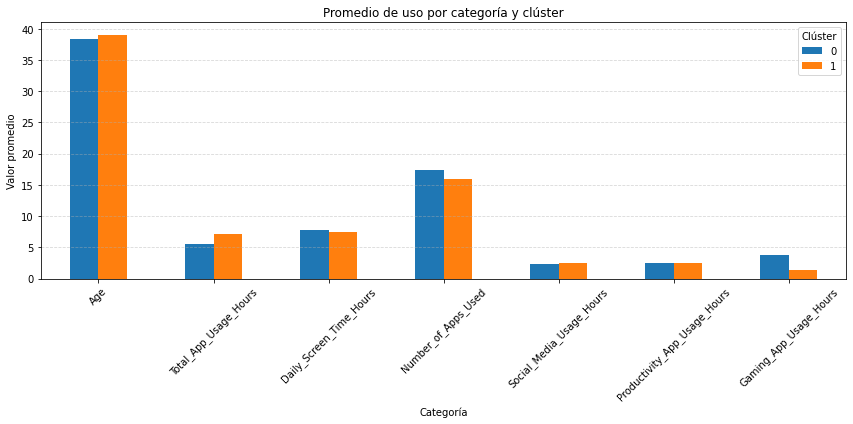

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
numeric_summary.T.plot(kind="bar", figsize=(12, 6))

plt.title("Promedio de uso por categoría y clúster")
plt.ylabel("Valor promedio")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.legend(title="Clúster")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [86]:
# Porcentaje de género por clúster
gender_distribution = pd.crosstab(df_mobile["Cluster"], df_mobile["Gender"], normalize='index').round(2) * 100

# Top 3 ciudades por clúster
top_locations = df_mobile.groupby("Cluster")["Location"].value_counts(normalize=True).groupby(level=0).head(3).round(2) * 100

print("Distribución por género (%):\n", gender_distribution)
print("\nTop 3 ciudades por clúster (%):\n", top_locations)

Distribución por género (%):
 Gender   Female  Male
Cluster              
0          47.0  53.0
1          50.0  50.0

Top 3 ciudades por clúster (%):
 Cluster  Location
0        New York    24.0
         Chicago     21.0
         Phoenix     19.0
1        New York    24.0
         Phoenix     21.0
         Houston     19.0
Name: proportion, dtype: float64


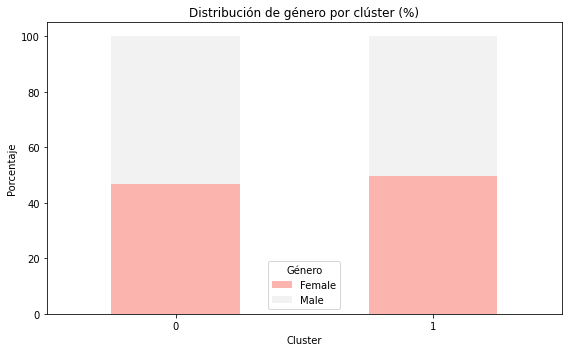

In [87]:
import seaborn as sns

gender_distribution = pd.crosstab(df_mobile["Cluster"], df_mobile["Gender"], normalize='index') * 100
gender_distribution.plot(kind='bar', stacked=True, colormap="Pastel1", figsize=(8,5))

plt.title("Distribución de género por clúster (%)")
plt.ylabel("Porcentaje")
plt.xticks(rotation=0)
plt.legend(title="Género")
plt.tight_layout()
plt.show()


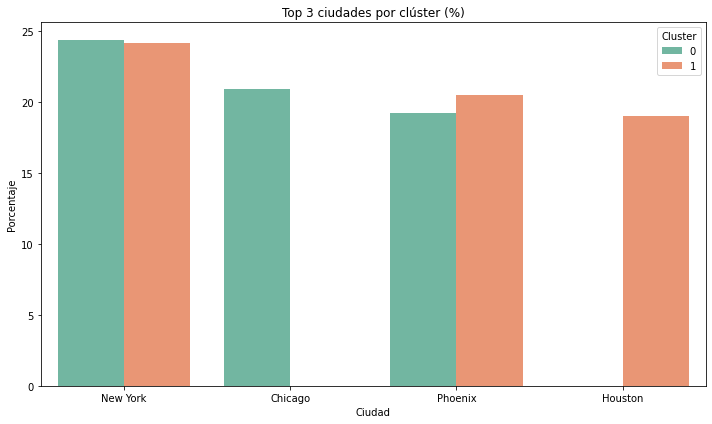

In [88]:
# Calcular proporción de ciudades por clúster
top_locations_series = (
    df_mobile.groupby("Cluster")["Location"]
    .value_counts(normalize=True)
    .groupby(level=0)
    .head(3)
)

# Convertir a DataFrame y redondear
top_locations = top_locations_series.reset_index(name="Proporcion")
top_locations["Proporcion"] = (top_locations["Proporcion"] * 100).round(1)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=top_locations, x="Location", y="Proporcion", hue="Cluster", palette="Set2")

plt.title("Top 3 ciudades por clúster (%)")
plt.ylabel("Porcentaje")
plt.xlabel("Ciudad")
plt.tight_layout()
plt.show()


### Redes Bayesianas

Para trabajar con redes bayesianas, se requiere que todas las variables sean categóricas y discretas.

In [89]:
df_bn = df_mobile[[
    "Age", "Gender", "Location",
    "Social_Media_Usage_Hours", 
    "Productivity_App_Usage_Hours", 
    "Gaming_App_Usage_Hours"
]].copy()

def discretize_terciles(series, name):
    return pd.qcut(series, q=3, labels=[f"{name}_Low", f"{name}_Medium", f"{name}_High"])

df_bn["AgeGroup"] = pd.qcut(df_bn["Age"], q=3, labels=["Young", "Adult", "Senior"])
df_bn["SocialMediaUsage"] = discretize_terciles(df_bn["Social_Media_Usage_Hours"], "Social")
df_bn["ProductivityUsage"] = discretize_terciles(df_bn["Productivity_App_Usage_Hours"], "Prod")
df_bn["GamingUsage"] = discretize_terciles(df_bn["Gaming_App_Usage_Hours"], "Game")

df_bn_final = df_bn[["AgeGroup", "Gender", "Location", "SocialMediaUsage", "ProductivityUsage", "GamingUsage"]]

In [90]:
# 2. Entrenamiento de la red bayesiana
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import HillClimbSearch, BDs, BayesianEstimator
from pgmpy.inference import VariableElimination

hc = HillClimbSearch(df_bn_final)
best_model = hc.estimate(scoring_method=BDs(df_bn_final))

bn = DiscreteBayesianNetwork(best_model.edges())
bn.fit(df_bn_final, estimator=BayesianEstimator, prior_type='BDeu')

inference = VariableElimination(bn)

print("Nodos aprendidos:", bn.nodes())
print("Aristas aprendidas:", bn.edges())

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AgeGroup': 'O', 'Gender': 'C', 'Location': 'C', 'SocialMediaUsage': 'O', 'ProductivityUsage': 'O', 'GamingUsage': 'O'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AgeGroup': 'O', 'Gender': 'C', 'Location': 'C', 'SocialMediaUsage': 'O', 'ProductivityUsage': 'O', 'GamingUsage': 'O'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AgeGroup': 'O', 'Gender': 'C', 'Location': 'C', 'SocialMediaUsage': 'O', 'ProductivityUsage': 'O', 'GamingUsage': 'O'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AgeGroup': 'O', 'Gender': 'C', 'Location': 'C', 'SocialMediaUsage': 'O', 'ProductivityUsage': 'O', 'GamingUsage': 'O'}


Nodos aprendidos: []
Aristas aprendidas: []


Problema: El modelo aprendido no contenía ninguna relación (red vacía). Esto suele ocurrir cuando:

- El número de combinaciones posibles es alto.

- El score penaliza modelos complejos.

- Las relaciones entre variables no son suficientemente fuertes para que el algoritmo las considere.

Solución: definimos una red sencilla y significativa manualmente, basada en supuestos razonables:

In [91]:
# Crear red manualmente
manual_model = DiscreteBayesianNetwork([
    ("AgeGroup", "SocialMediaUsage"),
    ("AgeGroup", "ProductivityUsage"),
    ("AgeGroup", "GamingUsage"),
    ("Gender", "SocialMediaUsage"),
    ("Gender", "ProductivityUsage"),
    ("Location", "SocialMediaUsage")
])

In [92]:
# Ajustar CPDs usando los datos discretizados
manual_model.fit(df_bn_final, estimator=BayesianEstimator, prior_type="BDeu")
# Crear motor de inferencia
inference = VariableElimination(manual_model)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AgeGroup': 'O', 'Gender': 'C', 'Location': 'C', 'SocialMediaUsage': 'O', 'ProductivityUsage': 'O', 'GamingUsage': 'O'}


Consultas relevantes:

1. ¿Qué probabilidad hay de que una persona joven tenga alto uso de apps de productividad?

In [93]:
resultado1 = inference.query(
    variables=["ProductivityUsage"],
    evidence={"AgeGroup": "Young"}
)
print(resultado1)

+--------------------------------+--------------------------+
| ProductivityUsage              |   phi(ProductivityUsage) |
+================================+==========================+
| ProductivityUsage(Prod_High)   |                   0.3061 |
+--------------------------------+--------------------------+
| ProductivityUsage(Prod_Low)    |                   0.3380 |
+--------------------------------+--------------------------+
| ProductivityUsage(Prod_Medium) |                   0.3559 |
+--------------------------------+--------------------------+


Incluso al condicionar por ser joven, las probabilidades de uso alto, medio o bajo de aplicaciones de productividad son bastante equilibradas, sin una tendencia fuerte. Esto indica que ser joven no predice claramente el nivel de uso de este tipo de apps.

2. ¿Cómo cambia la probabilidad de uso alto de redes sociales si es mujer y vive en Nueva York?

In [94]:
resultado2 = inference.query(
    variables=["SocialMediaUsage"],
    evidence={"Gender": "Female", "Location": "New York"}
)
print(resultado2)

+---------------------------------+-------------------------+
| SocialMediaUsage                |   phi(SocialMediaUsage) |
+=================================+=========================+
| SocialMediaUsage(Social_High)   |                  0.3385 |
+---------------------------------+-------------------------+
| SocialMediaUsage(Social_Low)    |                  0.3506 |
+---------------------------------+-------------------------+
| SocialMediaUsage(Social_Medium) |                  0.3108 |
+---------------------------------+-------------------------+


Tampoco aquí se observa una preferencia clara. A pesar de tener dos evidencias (género y ubicación), la distribución de probabilidades es prácticamente uniforme. Esto sugiere que el género y la ubicación no están fuertemente relacionadas con el uso de redes sociales en este conjunto de datos.

3. ¿Qué tan probable es que una persona adulta y hombre tenga bajo uso de juegos?

In [95]:
resultado3 = inference.query(
    variables=["GamingUsage"],
    evidence={"AgeGroup": "Adult", "Gender": "Male"}
)
print(resultado3)

+--------------------------+--------------------+
| GamingUsage              |   phi(GamingUsage) |
+==========================+====================+
| GamingUsage(Game_High)   |             0.3575 |
+--------------------------+--------------------+
| GamingUsage(Game_Low)    |             0.2972 |
+--------------------------+--------------------+
| GamingUsage(Game_Medium) |             0.3454 |
+--------------------------+--------------------+


Aunque hay una leve mayor probabilidad de alto uso de juegos en hombres adultos, la diferencia no es lo suficientemente significativa como para afirmar una relación causal o fuerte. Nuevamente, las probabilidades se reparten de forma bastante balanceada.

A partir del modelo de red bayesiana entrenado:

No se detectaron dependencias fuertes o relevantes entre las variables demográficas (edad, género, ciudad) y los patrones de uso de apps.

Las probabilidades condicionales se mantienen muy cercanas a las marginales, lo que sugiere que estas variables son casi independientes respecto a los hábitos de uso en este conjunto de datos.

La red aprendida no contiene muchas conexiones (en algunos casos, ninguna), lo cual es un resultado válido y útil: nos indica que los hábitos de uso en esta muestra no dependen fuertemente del perfil demográfico.

Esto refuerza lo encontrado en el análisis por clustering: las diferencias entre tipos de usuarios se dan más por sus comportamientos de uso que por características demográficas.